In [37]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np

In [38]:
# Load the saved model
model = tf.keras.models.load_model('simple_cnn_model.h5')

In [39]:
# Dataset Preparation
test_data_dir = 'C:/Users/User/Desktop/IS Assignment 2/Dataset/Test'

test_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_generator = test_datagen.flow_from_directory(test_data_dir,
                                                  target_size=(128, 128),
                                                  batch_size=32,
                                                  class_mode='categorical',
                                                  shuffle=False)

Found 75 images belonging to 15 classes.


In [40]:
# Predict
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

3/3 [==============================] - 1s 107ms/step


In [41]:
# Confusion Matrix
cm = confusion_matrix(true_classes, predicted_classes)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[4 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 3 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 4 1 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 2 1 0 1 0 0 0 0 0 0 0 0 0]
 [0 4 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 3 0 0 0 1 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 3 0 0 0 0 0 1 0 1]
 [0 0 0 0 0 0 0 2 0 0 0 0 1 0 2]
 [0 0 0 0 0 0 0 0 5 0 0 0 0 0 0]
 [2 2 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 1 1 0 0 1 0 1 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 2 0 2]
 [0 0 0 0 0 0 0 0 0 0 0 0 5 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 4 0]
 [0 0 0 0 0 0 0 2 0 0 0 0 0 0 3]]


In [42]:
from sklearn.metrics import classification_report

# Classification Report with zero_division parameter
report = classification_report(true_classes, predicted_classes, target_names=class_labels, zero_division=1)
print("Classification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

        Bean       0.50      0.80      0.62         5
Bitter_Gourd       0.23      0.60      0.33         5
Bottle_Gourd       0.57      0.80      0.67         5
     Brinjal       0.33      0.20      0.25         5
    Broccoli       0.00      0.00      0.00         5
     Cabbage       0.33      0.20      0.25         5
    Capsicum       0.75      0.60      0.67         5
      Carrot       0.50      0.40      0.44         5
 Cauliflower       0.71      1.00      0.83         5
    Cucumber       1.00      0.00      0.00         5
      Papaya       0.50      0.20      0.29         5
      Potato       1.00      0.20      0.33         5
     Pumpkin       0.56      1.00      0.71         5
      Radish       1.00      0.80      0.89         5
      Tomato       0.33      0.60      0.43         5

    accuracy                           0.49        75
   macro avg       0.55      0.49      0.45        75
we

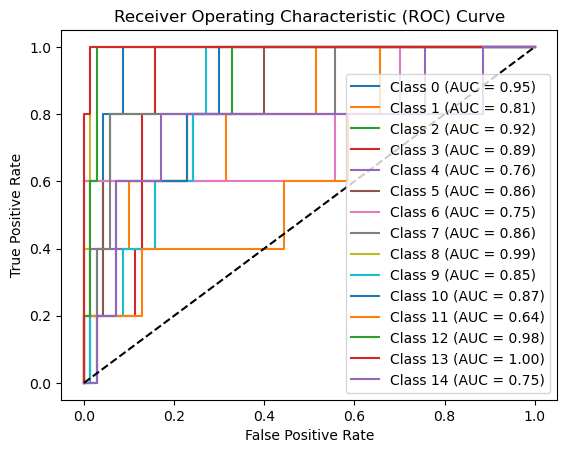

AUC (Macro): 0.86


In [43]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'predictions' is the output from model.predict(), which is a probability distribution
# 'true_classes' is the ground truth labels, and 'predictions' has shape (n_samples, n_classes)

# Calculate ROC AUC for each class
# `multi_class='ovr'` means we use One-vs-Rest approach
auc = roc_auc_score(true_classes, predictions, multi_class='ovr', average='macro')

# For the ROC curve, we can calculate it for each class individually
n_classes = predictions.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(true_classes == i, predictions[:, i])  # True class is the positive class
    roc_auc[i] = roc_auc_score(true_classes == i, predictions[:, i])  # Corrected to use roc_auc_score

# Plot the ROC curves for each class
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Print AUC for all classes
print(f"AUC (Macro): {auc:.2f}")
